<a href="https://colab.research.google.com/github/tmsapia/Analise_Airbnb_Porto/blob/main/An%C3%A1lise_explorat%C3%B3ria_dos_dados_do_Airbnb_Cidade_do_Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória dos dados do Airbnb - Cidade do Porto, Portugal

<center><img src="https://img.freepik.com/free-photo/aerial-view-famous-bridge-porto-portugal_268835-3550.jpg?w=740" height="400px"></center>

<center><a href='https://www.freepik.com/photos/travel-city'>Travel city photo created by vwalakte - www.freepik.com</a></center>

A cidade do Porto - que deu o nome a Portugal - fica localizada no noroeste de Portugal, na margem norte do Rio Douro e é a segunda maior cidade do país.
Nos séculos XIV e XV, a cidade foi crucial no desenvolvimento da construção naval portuguesa e foi de lá que, em 1415, o Infante D. Henrique partiu para explorar a costa ocidental africana, iniciando a Era dos Descobrimentos Portugueses.

Hoje, Porto é uma cidade conhecida mundialmente por seus vinhos, pontes, arquitetura, gastronomia, times de futebol e pela sua principal universidade pública: a Universidade do Porto, que está entre as 200 melhores universidades do Mundo e entre as 100 melhores universidades da Europa. Além disso, é conhecida também pelo seu centro histórico que, desde 1996, está classificado como Patrimônio Mundial pela UNESCO. 



# Airbnb

[Airbnb](https://www.airbnb.com.br/) é uma plataforma que conecta anfitriões, que desejam anunciar suas casas/apartamentos/quartos para locação, com turistas que querem alternativas às hospedagens tradicionais. Da mesma forma que a Uber não possui nenhum carro e o Ifood não tem nenhum restaurante, a Airbnb tamnbém não possui nenhum hotel.

A empresa foi fundada em agosto de 2008 e, recentemente, em 2021, já tinha mais de 7 milhões de anúncios cadastrados, em mais de 100.000 cidades de 220 países e regiões ao redor do mundo. 

No site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a empresa disponibiliza diversos conjuntos de dados para download. Para a nossa análise, utilizaremos os dados da cidade do Porto e o arquivo que vamos utilizar é o `	listings.csv`, que contém informações resumidas dos anúncios dessa cidade.

*Obs.: Os dados diponibilizados mais recentes dessa região são de 08/12/2021.*



#Análise exploratória 

O objetivo desse caderno é, por meio da linguagem Python, realizar uma breve análise exploratória dos dados de anúncios do Airbnb na cidade do Porto, Portugal. 

Para conhecer melhor os dados e também tratá-los, vamos seguir com as seguintes avaliações:

* Verificar tamanho do dataset (quantidade de entradas e variáveis) e tipos das variáveis
* Detectar e tratar de valores ausentes
* Detectar e limpar outliers
* Verificar se há ou não correlação entre as variáveis

Após completarmos os passos acima, daremos início à extração de informações/insights do nosso data frame.

## Obtenção dos Dados


Para iniciar, vamos importar todos os pacotes necessários e então colocar os dados em um data frame.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap



In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-12-08/visualisations/listings.csv")



## Análise e tratamento dos dados


Antes de iniciar qualquer análise, vamos verificar a "cara" do nosso *dataset*, analisando as 5 primeiras entradas (linhas).

In [ ]:
#mostra as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.16,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,20,2,148,2021-11-23,1.14,7,310,12,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,69,3,192,2021-11-27,1.65,3,347,9,634/AL


Para facilitar a compreensão do significado de cada variável, segue abaixo um dicionário:

* `id` -  Identificador único do anúncio 
* `name` - Título do anúnico
* `host_id` - Identificador único do host (locador)
* `host_name` -   Nome do(s) locador(es)
* `neighbourhood_group` - Nome da cidade
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade   
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de hospedagem oferecida (casa/apartamento inteiro, quarto privativo, quarto compartilhado ou quarto de hotel)
* `price` -   Valor diário da locação
* `minimum_nights` - O mínimo de noites de estadia
* `number_of_reviews` - Número total de avaliações desde a criação do anúncio
* `last_review` - Data da última avaliação recebida
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de anúncios que o mesmo locador tem  
* `availability_365` - Quantidade de dias em um ano que o imóvel está disponível para locação
* `number_of_reviews_ltm` - Quantidade de avaliações recebidas nos últimos 12 meses 



### Informações gerais, volume da dados, tipos das variáveis e dados ausentes

Já conhecemos o significado de cada variável (colunas) e também já demos uma olhada nas 5 primeiras entradas (linhas). Com essas informações, já é possível perceber que o data frame possui informações de outras cidades da Região do Porto também, como Paredes. 

Vamos primeiro analisar o data frame como um todo, utilizando `.info()`



In [ ]:
# identificar o volume de dados do DataFrame e algumas outras informações
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10748 non-null  int64  
 1   name                            10748 non-null  object 
 2   host_id                         10748 non-null  int64  
 3   host_name                       10744 non-null  object 
 4   neighbourhood_group             10748 non-null  object 
 5   neighbourhood                   10748 non-null  object 
 6   latitude                        10748 non-null  float64
 7   longitude                       10748 non-null  float64
 8   room_type                       10748 non-null  object 
 9   price                           10748 non-null  int64  
 10  minimum_nights                  10748 non-null  int64  
 11  number_of_reviews               10748 non-null  int64  
 12  last_review                     

Nosso data frame tem 10748 entradas e 18 variáveis. Temos 3 variáveis do tipo `float`, 8 do tipo `int` e 7 do tipo `object`, que são strings (texto). 

Vamos ver agora quantas cidades diferentes temos no data frame e qual a porcentagem delas em relação ao total de entradas. Como vamos analisar somente a cidade do Porto, precisaremos apenas das linhas que possuem a variável `neighbourhood_group` igual a `PORTO`.




In [ ]:
#cidades que constam no data frame
df.neighbourhood_group.value_counts()

PORTO                   7837
VILA NOVA DE GAIA       1189
MATOSINHOS               444
VILA DO CONDE            273
PÓVOA DE VARZIM          257
ESPINHO                  128
GONDOMAR                 112
AROUCA                   111
MAIA                      97
SANTA MARIA DA FEIRA      63
PAREDES                   54
VALE DE CAMBRA            48
OLIVEIRA DE AZEMÉIS       40
SANTO TIRSO               31
VALONGO                   26
SÃO JOÃO DA MADEIRA       22
TROFA                     16
Name: neighbourhood_group, dtype: int64

In [ ]:
#porcentagem de cada cidade em relação ao total de entradas
df.neighbourhood_group.value_counts()/df.shape[0]

PORTO                   0.729159
VILA NOVA DE GAIA       0.110625
MATOSINHOS              0.041310
VILA DO CONDE           0.025400
PÓVOA DE VARZIM         0.023911
ESPINHO                 0.011909
GONDOMAR                0.010421
AROUCA                  0.010328
MAIA                    0.009025
SANTA MARIA DA FEIRA    0.005862
PAREDES                 0.005024
VALE DE CAMBRA          0.004466
OLIVEIRA DE AZEMÉIS     0.003722
SANTO TIRSO             0.002884
VALONGO                 0.002419
SÃO JOÃO DA MADEIRA     0.002047
TROFA                   0.001489
Name: neighbourhood_group, dtype: float64

Vemos que a cidade do Porto representa 72,91% do nosso data frame, com um total 7837 entradas. Agora, vamos selecionar somente as linhas com informações da cidade do Porto e salvar no nosso data frame. 




In [ ]:
#seleciona apenas linhas com informações da cidade do Porto e salva no data frame df
df = df.loc[df.neighbourhood_group == 'PORTO']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7837 entries, 0 to 10746
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7837 non-null   int64  
 1   name                            7837 non-null   object 
 2   host_id                         7837 non-null   int64  
 3   host_name                       7834 non-null   object 
 4   neighbourhood_group             7837 non-null   object 
 5   neighbourhood                   7837 non-null   object 
 6   latitude                        7837 non-null   float64
 7   longitude                       7837 non-null   float64
 8   room_type                       7837 non-null   object 
 9   price                           7837 non-null   int64  
 10  minimum_nights                  7837 non-null   int64  
 11  number_of_reviews               7837 non-null   int64  
 12  last_review                     6

Agora que o nosso data frame possui apenas as informações da cidade do Porto, podemos continuar a análise.



Já é possível ver que temos valores ausentes nas colunas, `last_review` e `reviews_per_month`, que possuem 6709 entradas, sendo que temos 7359 entradas no total no nosso data frame.

In [ ]:
#verificar porcentagem de dados ausentes
print('Porcentagem de dados ausentes em reviews_per_month =', 
      100*df.reviews_per_month.isna().sum()/df.shape[0], '%')



Porcentagem de dados ausentes em reviews_per_month = 14.393262728084727 %


Acima foi calculado que as colunas `last_review` e `reviews_per_month` possuem cada uma quase 15% de dados ausentes. Com isso, podemos pensar em duas hipóteses: A primeira é que temos um erro no preenchimento desses valores e a segunda é que simplesmente esses imóveis nunca receberam um review. Vamos assumir a segunda hipótese, mas o correto seria conversar com o time de negócios para entender realmente o motivo da ausência desses dados. Nesse caso, vamos substituir os valores ausentes apenas em `reviews_per_month` com 0. 

Temos também a coluna `host_name`, com dados ausentes, mas vamos mantê-la por enquanto. A coluna `host_id` não tem dados ausentes e indica com mais precisão quem é o usuário responsável pelo anúncio, já que podemos ter nomes repetidos na coluna `host_name`. A coluna `licence` também possui valores ausentes, mas não vamos utiliza-la na nossa análise, portanto, vamos remover essa coluna. 



In [ ]:
#remove a coluna 'license'
df = df.drop(columns=['license'])

In [ ]:
#preenche com 0 os dados auseetes de reviews_per_month
df.reviews_per_month = df.reviews_per_month.fillna(0)



Um ponto importante também é verificar se temos informações duplicadas no nosso data frame. Para validar isso, vamos utilizar a variável `id`, já que ela é única para cada anúncio. Abaixo é possível verificar que temos 7837 IDs únicos em nosso data frame. Como vimos anteriormente que também temos 7837 entradas em nosso data frame, significa que não temos informações duplicadas.

In [ ]:
# Quantidade de valores únicos na variável id
len(df.id.unique())

7837

### Detecção dos outliers


Também conhecidos como "pontos fora da curva", os outliers são valores incomuns encontrados em um conjunto de dados. Eles causam anomalias nas análises estatísticas, assim fazendo com que a análise dos dados não represente necessariamente a realidade.

Entretanto, ao encontrar um outlier, não podemos simplesmete excluí-lo dos dados, pois é importante primeiro entender o motivo da existência dele. Por exemplo: O outlier ocorreu devido a algum erro de medida/cadastro? Caso sim, é melhor excluí-lo.

Agora, e se o outlier não foi causado por um erro? Ou seja, e se o outlier é um valor que foi realmente observado? Nesse caso, deve-se analisar com mais cuidado como trata-lo. Uma boa maneira também de decidir é fazer a análise com e sem os outliers para validar se houve ou não alguma mudança substancial no resultado da análise. Entretanto, não vamos entrar nesse ponto agora, pois o assunto vai longe.
Para essa análise dos dados do Airbnb, vamos excluir os outliers para facilitar um pouco as coisas.

Antes de iniciarmos a limpeza, vamos dar uma olhada no resumo estatístico do nosso dataframe com o método describe() e também plotar histogramas para verificar o tipo de distribuição das variáveis.

In [ ]:
#df.describe().round(2)
variaveis = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
             'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'] 
df[variaveis].describe().round(2)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7837.00,7837.00,7837.00,7837.00,7837.00,7837.00,7837.00
mean,84.64,3.39,50.98,1.30,28.36,234.52,7.88
std,322.46,20.41,79.16,1.47,75.09,131.87,12.43
min,9.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,40.00,1.00,2.00,0.13,2.00,130.00,0.00
50%,57.00,2.00,17.00,0.77,5.00,289.00,2.00
75%,80.00,2.00,66.00,2.03,15.00,348.00,11.00
max,11799.00,1123.00,733.00,11.54,373.00,365.00,128.00


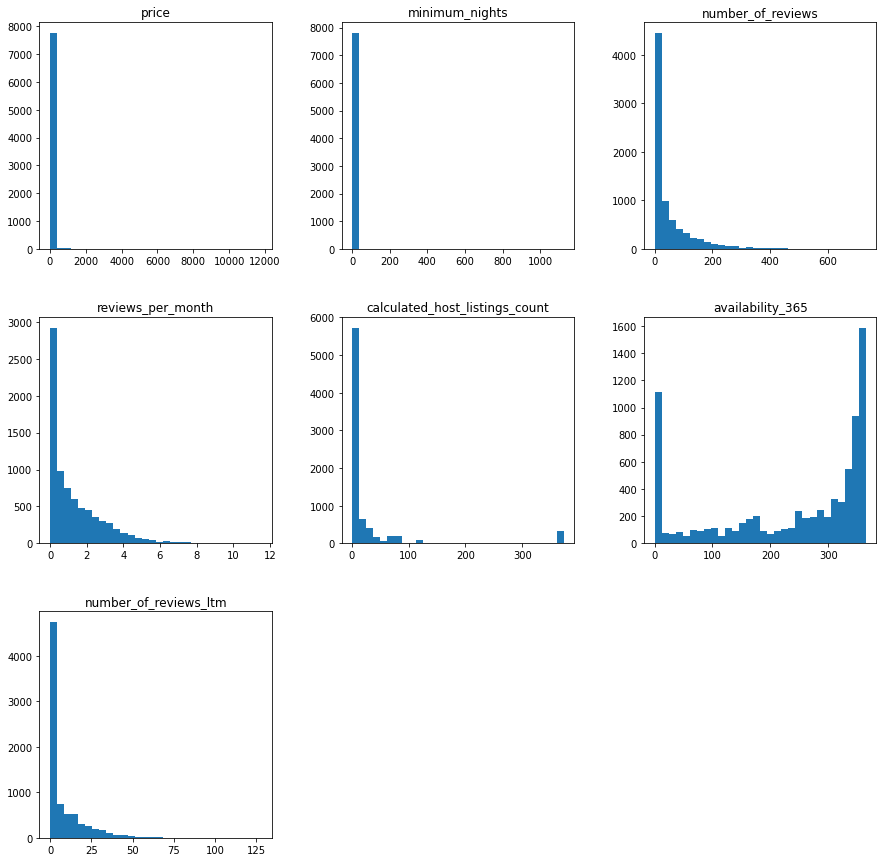

In [ ]:
# plotar o histograma das variáveis numéricas
df[variaveis].hist(bins=30, figsize=(15,15), grid=False);


Analisando os histogramas e o resumo estatístico, já conseguimos algumas informações interessantes:

* `price` - Valor máximo de 11.799,00 euros, sendo que o terceiro quartil (75%) está em 80 euros, o que indica a presença de outliers. 11.799,00 euros é um valor bem alto, mas é plausível que o valor seja esse mesmo dependendo da casa/apartamento. De qualquer maneira, não deixa de ser um outlier.

* `minimum_nights` - Encontramos mais um outlier, que é o valor máximo de 1123 noites. 

* `calculated_host_listings_count` - Encontramos um valor máximo de 373 anúncios de um único locador (mais a frente vamos verificar esse ponto de forma mais detalhada), sendo que a mediana ficou em 5 anúncios e o terceiro quartil (75%) ficou em 15. Logo, encontramos mais um outlier.

* `availability_365` Encontramos um mínimo de 0 dias de disponibilidade por ano. Provavelmente, alguns proprietários resolveram bloquear seus imóveis para locação de forma temporária ou até definitiva. É possível observar também que a maioria dos imóveis fica disponível para locação praticamente durante o ano todo.

* `number_of_reviews` - O terceiro quartil (75%) está em 66 reviews, enquanto o número máximo encontrado foi de 733. São valores possíveis, uma vez que existe a possibilidade de serem anúncios antigos e, por isso, foram alugados mais vezes e tiveram mais reviews também. De qualquer forma, também não deixa de ser outro outlier.

* `number_of_reviews_ltm` - A mediana está em 2, o terceiro quartil (75%) está em 11, mas o número máximo encontrado foi de 128. Mais um outlier.

* `reviews_per_month` - Também apresenta outliers. A mediana está em 0,77, o terceiro quartil (75%) está em 2,03, mas o número máximo encontrado foi de 11,54. 


Agora, utilizando o método IQR Score (variação interquartil), é possível encontrar os limites superior e inferior para cada variável. Isto é, os limites a partir dos quais o valor é considerado um outlier. Com essa informação, poderemos excluir os outliers dos nossos dados.

O primeiro passo é calcular o IQR. Ele é o valor do terceiro quartil (75%) menos o valor do primeiro quartil (25%), que já temos na tabela gerada pelo `describe()`, mas vamos calcular aqui. 

Após a obtenção do valor do IQR precisamos calcular os limites superior e inferior. Segue a fórmula para esse cálculo:

Limite superior = Q3 + ( 1,5 * IQR )

Limite inferior = Q1 - ( 1,5 * IQR )

Segue abaixo uma imagem explicativa sobre o boxplot, também conhecido como "gráfico de caixa, que utiliza do método IQR score para gerar a representação gráfica da distribuição dos dados e dos outliers. 

![picture](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)



> Fonte: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51  




In [ ]:
#definindo as colunas que queremos utilizar para os cálculos
colunas = ['price', 'minimum_nights', 'number_of_reviews',
           'reviews_per_month', 'number_of_reviews_ltm', 'calculated_host_listings_count']

#cria as listas 
iqr = []
q1 =[]
q3 = []
sup_lim = []
inf_lim = []
index = 0;

#loop para realizar os calculos de limite superior e inferior
for coluna in colunas:
  q1.append(df[coluna].quantile(.25)) #calcula valor de q1 e adiciona na lista q1
  q3.append(df[coluna].quantile(.75)) #calcula valor de q3 e adiciona na lista q3
  iqr.append(q3[index] - q1[index]) #calcula o valor de iqr e adiciona na lista iqr
  sup_lim.append(q3[index] + 1.5*iqr[index]) #calcula o valor do limite superior e adiciona na lista sup_lim
  inf_lim.append(q1[index] - 1.5*iqr[index]) #calcula o valor do limite inferior e adiciona na lista inf_lim
  print('O limite superior de', coluna, 'é', round(sup_lim[index],2),
        'e o limite inferior é', round(inf_lim[index],2))
  index += 1 

print('\n')
index = 0;

#loop para informar a quantidade de entradas que existem com valores acima do limite superior de cada variável
for coluna in colunas:
  print('Existem', len(df[df[coluna] > sup_lim[index]]), 
        'anúncios com valores de', coluna, 'acima de', round(sup_lim[index],2), '(Representa',
        round(len(df[df[coluna] > sup_lim[index]])/df[coluna].shape[0]*100,2),'% da base)')
  index +=1


O limite superior de price é 140.0 e o limite inferior é -20.0
O limite superior de minimum_nights é 3.5 e o limite inferior é -0.5
O limite superior de number_of_reviews é 162.0 e o limite inferior é -94.0
O limite superior de reviews_per_month é 4.88 e o limite inferior é -2.72
O limite superior de number_of_reviews_ltm é 27.5 e o limite inferior é -16.5
O limite superior de calculated_host_listings_count é 34.5 e o limite inferior é -17.5


Existem 524 anúncios com valores de price acima de 140.0 (Representa 6.69 % da base)
Existem 437 anúncios com valores de minimum_nights acima de 3.5 (Representa 5.58 % da base)
Existem 695 anúncios com valores de number_of_reviews acima de 162.0 (Representa 8.87 % da base)
Existem 238 anúncios com valores de reviews_per_month acima de 4.88 (Representa 3.04 % da base)
Existem 634 anúncios com valores de number_of_reviews_ltm acima de 27.5 (Representa 8.09 % da base)
Existem 1072 anúncios com valores de calculated_host_listings_count acima de 34.5 

A partir dos cálculos realizados acima também podemos verificar alguns pontos interessantes.

Em relação à variável `number_of_reviews`, vemos que os valores acima de 162 representam 8.87% da nossa base. Isso pode indicar que são imóveis que estão anunciados há muito tempo na plataforma. Entretanto, também existe a possibilidade de uma parte desses imóveis serem muito ruins e, com isso, várias pessoas resolveram reclamar.

Sobre a variável `calculated_host_listings_count `, temos quase 14% da nossa base com 35, ou mais, anúncios por locador. Utilizando o método `value_counts()` na variável `host_name` descobrimos que existem plataformas que auxiliam os locadores para o cadastro/gerenciamento das locações, como o GuestReady, HostWise, Liiiving, entre outros. As variáveis `host_name` e `host_id` acabam sendo preenchidas com informações dessas plataformas. Com isso, para fazer uma análise estatística mais precisa em relação a quantidade de anúncios por locador (`host_id`)seria necessário remover as linhas que têm essas plataformas de gerenciamento. Como esses outliers não vão impactar nossas análises, não vamos tratá-los no momento.


In [ ]:
# lista quantidade de anúncios por host_name
df.host_name.value_counts().head(15)

GuestReady         427
Maria              144
Rui                134
José               125
Pedro              107
Host Wise           96
João                93
Ana                 93
Joana               91
Liiiving            84
António             82
Oporto              82
Miguel              77
Nuno                73
Feels Like Home     73
Name: host_name, dtype: int64

### Visualização dos outliers

Abaixo iremos gerar os gráficos de caixa para as varíaveis que identificamos a presença de outliers.

Em alguns casos os outliers são valores tão distantes que distorcem completamente a representação gráfica do box plot, ficando até complicado de visualizar, como podem ver abaixo.

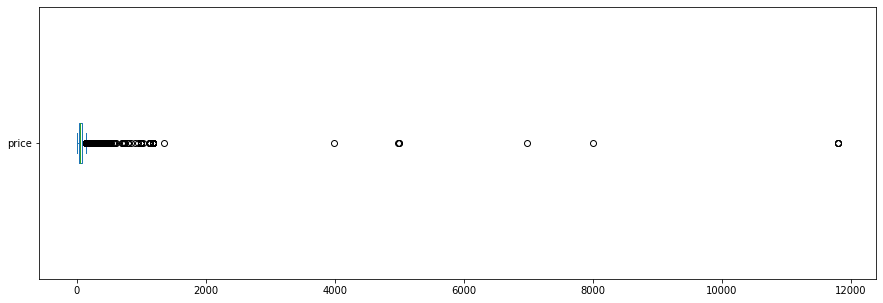

In [ ]:
#boxplot da variável price
df.price.plot(kind='box', vert=False, figsize=(15,5));



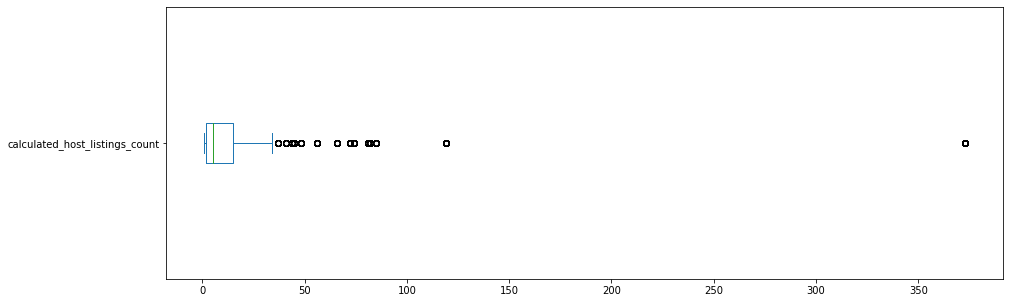

In [ ]:
#boxplot da variável calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,5));

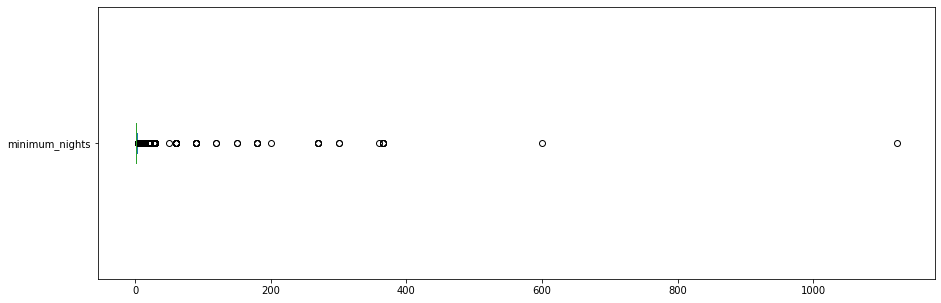

In [ ]:
#boxplot da variável minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,5));

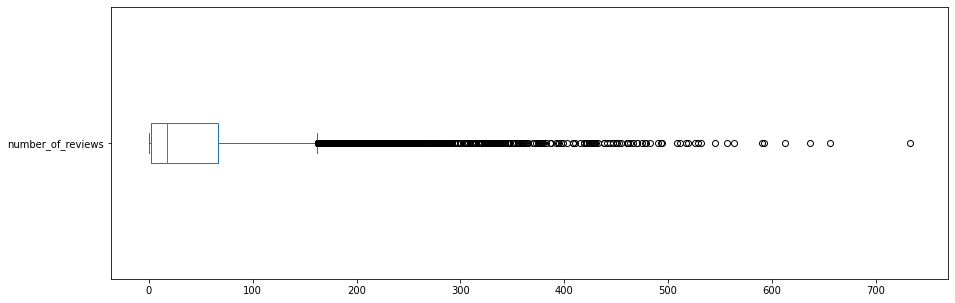

In [ ]:
#boxplot da variável number_of_reviews

df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,5));

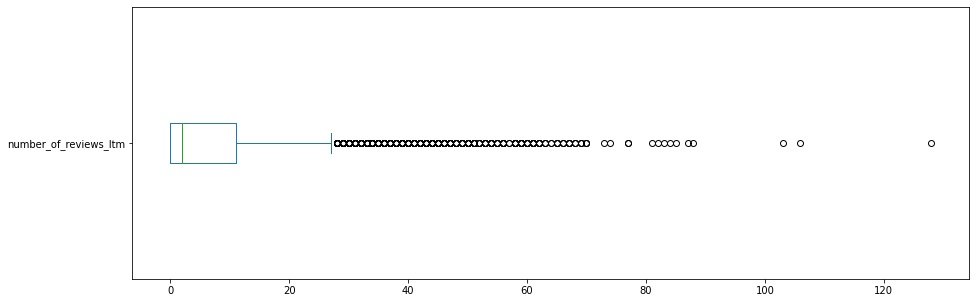

In [ ]:
#boxplot da variável number_of_reviews_ltm

df.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15,5));

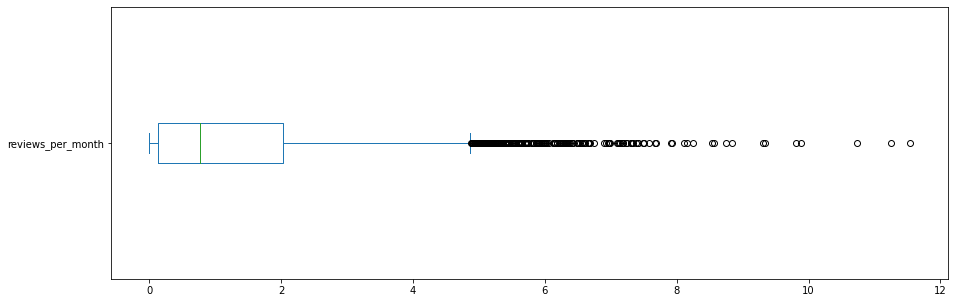

In [ ]:
#boxplot da variável reviews_per_month

df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,5));

### Limpeza dos outliers

Para realizar a limpeza, vamos excluir do data frame as linhas com valores acima dos limites superiores calculados para as variáveis `price`, `minimum_nights`, `number_of_reviews`, `number_of_reviews_ltm` e `reviews_per_month`. (obs.: Para os limites inferiores não temos nenhum outlier)

In [ ]:
#Criando uma cópia do dataframe
df_clean = df.copy();

#excluindo as linhas com valores acima dos limites superiores calculados

df_clean = df_clean.drop(df_clean[df_clean.price > 140].index, axis=0);
df_clean = df_clean.drop(df_clean[df_clean.minimum_nights >= 3.5].index, axis=0);
df_clean = df_clean.drop(df_clean[df_clean.number_of_reviews > 162].index, axis=0);
df_clean = df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 27.5].index, axis=0);
df_clean = df_clean.drop(df_clean[df_clean.reviews_per_month > 4.88].index, axis=0);

#### Shape do data frame - Antes e depois

In [ ]:
#Shape do data frame antes da limpeza
print('Quantidade de entradas antes da limpeza:', df.shape[0])

#Shape do data frame após a limpeza
print('Quantidade de entradas depois da limpeza:', df_clean.shape[0])

#porcentagem de entradas removidas do data frame
porcentagem_removida = (1-(df_clean.shape[0]/df.shape[0]))*100
print('Foi removido', round(porcentagem_removida,2), '% do data frame')

Quantidade de entradas antes da limpeza: 7837
Quantidade de entradas depois da limpeza: 5822
Foi removido 25.71 % do data frame


#### Histogramas - Antes e depois

A diferença dos histogramas plotados com os dados do data frame antes e depois da limpeza é muito nítida. Percebam como conseguimos ver mais claramente a distribuição dos valores após a limpeza.

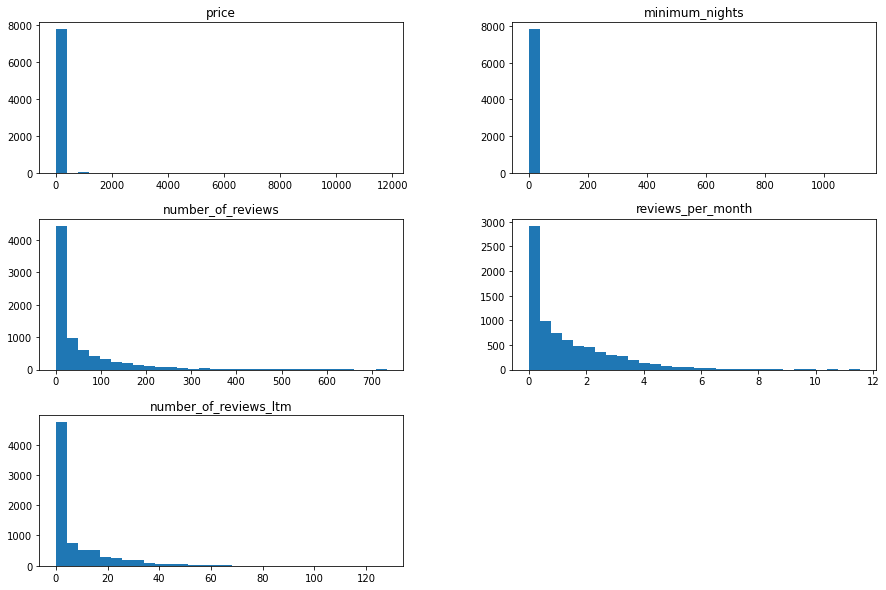

In [ ]:
# Histograma antes da limpeza dos outliers
df[['price', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'number_of_reviews_ltm']].hist(bins=30, figsize=(15,10), grid=False);

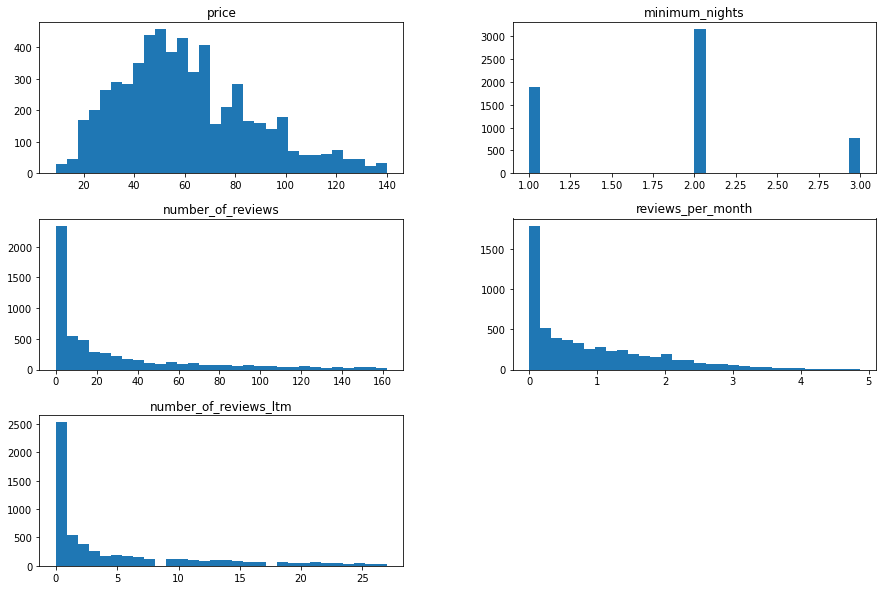

In [ ]:
# Histograma após a limpeza dos outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'number_of_reviews_ltm']].hist(bins=30, figsize=(15,10), grid=False);

#### Resumo estatístico - Antes e depois

Por meio do resumo estatístico também é possível ver claramente a diferença após a retirada dos outliers. 

In [ ]:
# resumo estatístico antes a limpeza dos outliers
df[['price', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'number_of_reviews_ltm']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
count,7837.00,7837.00,7837.00,7837.00,7837.00
mean,84.64,3.39,50.98,1.30,7.88
std,322.46,20.41,79.16,1.47,12.43
min,9.00,1.00,0.00,0.00,0.00
25%,40.00,1.00,2.00,0.13,0.00
50%,57.00,2.00,17.00,0.77,2.00
75%,80.00,2.00,66.00,2.03,11.00
max,11799.00,1123.00,733.00,11.54,128.00


In [ ]:
# resumo estatístico após a limpeza dos outliers
df_clean[['price', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'number_of_reviews_ltm']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
count,5822.0,5822.00,5822.00,5822.00,5822.00
mean,60.8,1.81,28.52,0.90,4.71
std,26.4,0.65,38.59,0.96,6.78
min,9.0,1.00,0.00,0.00,0.00
25%,41.0,1.00,2.00,0.09,0.00
50%,58.0,2.00,11.00,0.58,1.00
75%,76.0,2.00,40.00,1.44,7.00
max,140.0,3.00,162.00,4.87,27.00


### Correlação existente entre as variáveis

Outro passo importante na análise exploratória é verificar se existe algum tipo de correlação entre as variáveis. Um dos métodos que podem ser utilizados para medir essa correlação é o *coeficiente de correlação de Pearson ($ρ$)*. Vamos utilizar `.corr()` para obter uma matriz com os valores de $ρ$ e depois vamos gerar um heatmap para facilitar a visualização.

In [ ]:
# cria uma matriz de correlação
corr_clean = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'latitude', 'longitude']].corr()    


# mostra a matriz de correlação
display(corr_clean)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,latitude,longitude
price,1.000000,-0.044161,-0.140260,-0.195694,-0.115883,0.158177,-0.139192,-0.223989,-0.071912
minimum_nights,-0.044161,1.000000,0.134496,0.047938,-0.074542,-0.174603,0.023767,0.092179,-0.019184
number_of_reviews,-0.140260,0.134496,1.000000,0.625211,0.079715,-0.043208,0.419651,-0.080085,-0.012135
reviews_per_month,-0.195694,0.047938,0.625211,1.000000,0.164818,0.099735,0.678335,-0.129400,0.013789
calculated_host_listings_count,-0.115883,-0.074542,0.079715,0.164818,1.000000,0.098800,0.171309,-0.015411,-0.008176
availability_365,0.158177,-0.174603,-0.043208,0.099735,0.098800,1.000000,0.194356,-0.195987,-0.004945
number_of_reviews_ltm,-0.139192,0.023767,0.419651,0.678335,0.171309,0.194356,1.000000,-0.150717,-0.013287
latitude,-0.223989,0.092179,-0.080085,-0.129400,-0.015411,-0.195987,-0.150717,1.000000,-0.096300
longitude,-0.071912,-0.019184,-0.012135,0.013789,-0.008176,-0.004945,-0.013287,-0.096300,1.000000


Como default, o método `.corr()` calcula a correlação entre as variáveis com o *coeficiente de correlação de Pearson ($ρ$)*. Esse coeficiente pode apresentar valores entre 1 e -1, onde **$ρ = 1$** indica uma correlação perfeita positiva (as duas váriaveis aumentam ou diminuem juntas) e **$ρ = -1$** indica uma correlação negativa perfeita (se uma variável aumenta, a outra diminui). Já se **$ρ = 0$**, as variáveis não possuem correlação linear. 

Abaixo segue uma interpretação para os valores de **$ρ$**

* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

Agora, vamos gerar um heatmap com a biblioteca `seaborn` para visualizar as correlações.

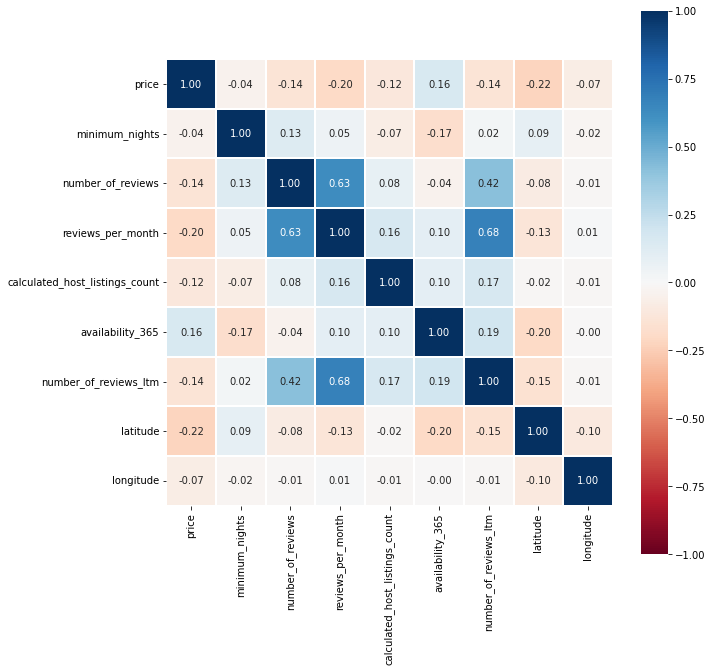

In [ ]:
# plot de um heatmap a partir das correlações utilizando seaborn
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_clean, cmap='RdBu', fmt='.2f', square=True, annot=True, linewidths=1, vmin=-1, ax=ax);

Podemos observar com o heatmap que as variáveis `number_of_reviews`, `number_of_reviews_ltm` e `reviews_per_month` são as mais correlacionadas. Isso é meio óbvio de deduzir e nem seria necessário um heatmap, mas é válido para o propósito aqui. Também temos as variáveis `latitude` e `longitude`, que possuem uma correlação negativa moderada.

Todas as outras variáveis possuem correlações positivas ou negativas desprezíveis (estão entre 0 e 0.3).




## **Obtendo informações a partir dos dados**

Agora que já conhecemos melhor os nossos dados e também já removemos os outliers, podemos começar a responder algumas perguntas.

#### Qual é a média de preço por dia de locação (por tipo de imóvel e no geral)?

In [ ]:
# média de preço da diária por tipo de imóvel

media_de_preço = round(df_clean.groupby('room_type').price.mean().sort_values(ascending=False),2)

media_de_preço

room_type
Hotel room         80.91
Entire home/apt    64.08
Private room       44.47
Shared room        24.05
Name: price, dtype: float64

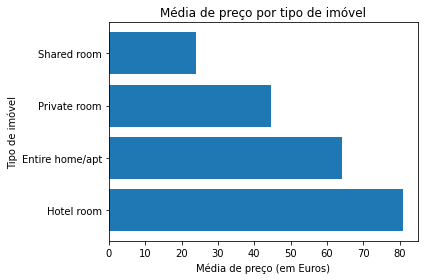

In [ ]:
# gráfico de média de preço da diária por tipo de imóvel

plt.barh(media_de_preço.index, media_de_preço)

plt.ylabel('Tipo de imóvel')
plt.xlabel('Média de preço (em Euros)')
plt.title('Média de preço por tipo de imóvel')
plt.tight_layout()

In [ ]:
#calcula a média de preço das diárias
print('A média de preço das diárias, independente do tipo de imóvel, é', round(df_clean.price.mean(),2), 'Euros')

A média de preço das diárias, independente do tipo de imóvel, é 60.8 Euros


Percebam como os valores mudam bastante quando fazemos a mesma análise com o dataframe antes de ser tratado. Por isso a importância de fazer previamente uma detecção e tratamento de outliers.

In [ ]:
#Dataframe antes do tratamento. Mostra a média de preço da diária por tipo de imóvel

round(df.groupby('room_type').price.mean().sort_values(ascending=False),2)

room_type
Hotel room         112.30
Entire home/apt     90.45
Private room        54.04
Shared room         23.30
Name: price, dtype: float64

#### Qual a média de preço em cada bairro e qual é o mais caro?

In [ ]:
#média de preços por bairro
prices_by_neighbourhood = df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

prices_by_neighbourhood

neighbourhood
Aldoar, Foz do Douro e Nevogilde                        74.244275
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    63.513161
Lordelo do Ouro e Massarelos                            59.421603
Bonfim                                                  55.573810
Campanhã                                                53.711409
Ramalde                                                 47.157025
Paranhos                                                44.016393
Name: price, dtype: float64

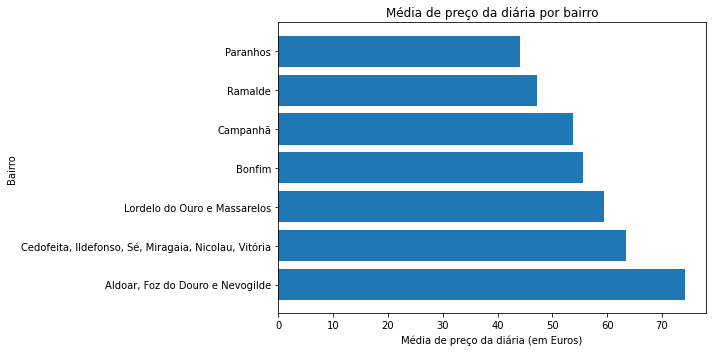

In [ ]:
#gráfico média de preços por bairro
plt.figure(figsize=(10,5))
plt.barh(prices_by_neighbourhood.index, prices_by_neighbourhood)

plt.ylabel('Bairro')
plt.xlabel('Média de preço da diária (em Euros)')
plt.title('Média de preço da diária por bairro')
plt.tight_layout()

obs.: Com uma breve pesquisa no google, descobri que os grupos "Aldoar, Foz do Douro e Nevogilde", "Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória" e "Lordelo do Ouro e Massarelos" são uniões de bairros (também chamados de freguesias) da cidade do Porto. No caso da base do Airbnb, os anúncios acabam pertencendo à essas uniões e não a cada bairro individualmente.

Acima foi calculado a média de preços por bairro, mas é importante também verificarmos a quantidade de anúncios por bairro. 

In [ ]:
#quantidade de anúncios por bairro
df_clean.groupby('neighbourhood').price.count().sort_values(ascending=False)



neighbourhood
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    3989
Bonfim                                                   840
Paranhos                                                 305
Lordelo do Ouro e Massarelos                             287
Campanhã                                                 149
Aldoar, Foz do Douro e Nevogilde                         131
Ramalde                                                  121
Name: price, dtype: int64

In [ ]:
#porcentagem de quantidade de anúncios por bairro
df_clean.groupby('neighbourhood').price.count().sort_values(ascending=False)/df_clean.shape[0]

neighbourhood
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    0.685160
Bonfim                                                  0.144280
Paranhos                                                0.052387
Lordelo do Ouro e Massarelos                            0.049296
Campanhã                                                0.025593
Aldoar, Foz do Douro e Nevogilde                        0.022501
Ramalde                                                 0.020783
Name: price, dtype: float64

Vemos acima que a união de *Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória*, possui um total de 3989 anúncios, o que representa 68,51% dos anúncios que temos em nosso data frame.
Já a união de *Aldoar, Foz do Douro e Nevogilde*, possui um total de 131 anúncios, o que representa apenas 2,25% da nossa base. Não temos dados suficientes para dizer que a união com 131 anúncios tem as diárias mais caras de Portugal.

Além disso, gerando abaixo os histogramas de preço dos dois bairros podemos ver que as uniões possuem distribuições bem diferentes. Enquanto uma é praticamente uma distribuição normal, a outra está bem deformada. Isso mostra que 131 anúncios não é um número suficiente de dados para a nossa análise. Com isso, não vamos considerar que a união com 131 anúncios é mais cara.

Outro ponto importante é que os bairros *Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória* ficam localizados no centro histórico do Porto e possuem a maior parte dos anúncios, o que torna mais seguro dizer que é a união de bairros mais cara do Porto, com uma média de 63,51 Euros por dia.

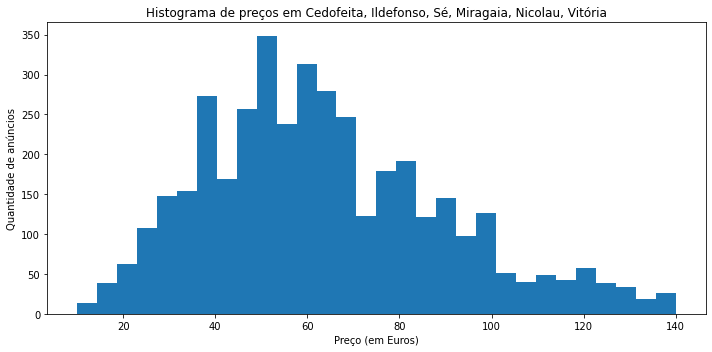

In [ ]:
# Histograma de preços em Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória 
df_clean.loc[df_clean.neighbourhood == 'Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória'].price.hist(bins=30, figsize=(10,5), grid=False);
plt.xlabel('Preço (em Euros)')
plt.ylabel('Quantidade de anúncios')
plt.title('Histograma de preços em Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória')
plt.tight_layout()

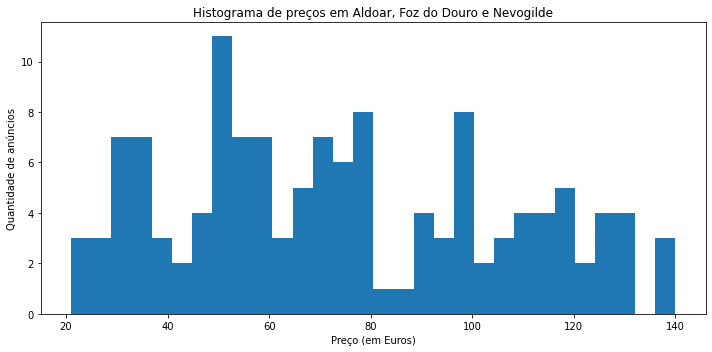

In [ ]:
# Histograma de preços em Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória 
df_clean.loc[df_clean.neighbourhood == 'Aldoar, Foz do Douro e Nevogilde'].price.hist(bins=30, figsize=(10,5), grid=False);
plt.xlabel('Preço (em Euros)')
plt.ylabel('Quantidade de anúncios')
plt.title('Histograma de preços em Aldoar, Foz do Douro e Nevogilde')
plt.tight_layout()



Em relação ao bairro mais barato, as análises mostraram que é o bairro Paranhos, cuja média de preço das diárias é de 44 Euros. Portanto, comparando com o bairro mais caro, se hospedar em Paranhos pode gerar, em média, uma economia de 40% na hospedagem. O valor mais barato do bairro de paranhos deve-se ao fato que é uma região mais afastada do centro histórico do Porto, onde se concentram os principais pontos turísticos da cidade.

#### Qual o tipo de imóvel mais alugado?

O tipo de imóvel mais alugado é o `Entire home/apt`, que representa 80,68% do nosso data frame, com 4697 anúncios. Já o tipo menos alugado é o `shared room`, que representa 0,72% do data frame, com 42 anúncios.

In [ ]:
# quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    4697
Private room        979
Hotel room          104
Shared room          42
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel disponível

porcentagens = round(df_clean.room_type.value_counts()/df_clean.room_type.shape[0]*100,2)

porcentagens

Entire home/apt    80.68
Private room       16.82
Hotel room          1.79
Shared room         0.72
Name: room_type, dtype: float64

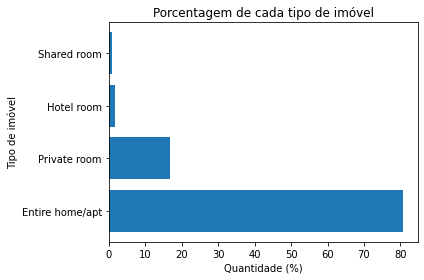

In [ ]:
#gráfico indicando a porcentagem de cada tipo de imóvel disponível

plt.barh(porcentagens.index, porcentagens)
plt.ylabel('Tipo de imóvel')
plt.xlabel('Quantidade (%)')
plt.title('Porcentagem de cada tipo de imóvel')
plt.tight_layout()

### Plot dos imóveis pela latitude-longitude

Utilizando a biblioteca [Folium](https://python-visualization.github.io/folium/), podemos gerar mapas e heatmaps interativos a partir dos dados inseridos, informando a latitude e longitude de cada ponto que queremos visualizar.

Abaixo vamos gerar:


*   Um mapa padrão para ver as localizações dos imóveis
*   Um HeatMap para ver onde se concentram os imóveis que estão dentre os 5% mais caros



In [ ]:
#plot dos imóveis pela latitude-longitude

#localização central do mapa e o zoom inicial
map = folium.Map(location=[41.1579, -8.6291], zoom_start=13)

#transforma a latitude e longitude em forma de tuplas e depois salva como uma lista
localization = list(zip(df_clean["latitude"], df_clean["longitude"]))

#cria os pontos que serão mostrados no mapa
marker_cluster = MarkerCluster(localization)

#adiciona os pontos no mapa
marker_cluster.add_to(map)

#exibe o mapa
map


In [ ]:
#plot dos imóveis que fazem parte dos 5% mais caros

#seleciona somente os imóveis que estão dentro os 5% mais caros
imoveis_mais_caros = df_clean.loc[df_clean.price >= 0.95*df_clean.price.max()]

#localização central do mapa e o zoom inicial
map = folium.Map(location=[41.1579, -8.6291], zoom_start=13)

#transforma a latitude e longitude em forma de tuplas e depois salva como uma lista
localization = list(zip(imoveis_mais_caros["latitude"], imoveis_mais_caros["longitude"]))

#cria os pontos que serão mostrados no mapa
heat_map = HeatMap(localization)

#adiciona os pontos no mapa
heat_map.add_to(map)

#exibe o mapa
map

Com os mapas gerados acima vemos que a maior parte dos imóveis está localizada próxima ao Centro Histórico. Em relação aos imóveis mais caros, vemos que existem alguns poucos em outros pontos, como Foz Douro e Avenida Boavista, que também são pontos turísticos da cidade, mas a maior parte também está concentrada no Centro Histórico do Porto e arredores, próxima a pontos turísticos como Ribeira e Ponte D. Luís I,  Livraria Lello, Catedral da Sé, Estação de São Bento, Torre dos Clérigos, entre outros. Com isso, fica fácil entender o motivo das diárias mais caras serem nessa região.

## Conclusões


A partir dos dados obtidos do Airbnb e utilizando a linguagem python, foi possível, de forma simples e rápida, importar, tratar e analisar um conjunto de dados. Com a análise, conseguimos ter um panorama da situação de preços, quantidades e localizações dos imóveis anunciados na cidade do Porto.

Pode-se perceber que a maior parte do tempo foi investida no tratamento dos dados, pois é uma fase extremamente importante da análise exploratória. Além de ter uma visão geral dos dados importados, conseguimos trabalhar para melhorar a qualidade deles, o que permite que a coleta de informações e insigths seja feita de forma mais assertiva.












